In [199]:
import os
import pandas as pd
import numpy as np

import math
import random
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

sns.set_style(style="darkgrid")

load csv files
    - combine all csv files as one df

In [200]:
# 0 is reliable
# 1 is unreliable

CSV_FILE_DIR_HEAD = "/Volumes/MySSD/PycharmProjects/MIS-COV19/"

CSV_FILE_DIR0 = CSV_FILE_DIR_HEAD + "dataset/reliable"
CSV_FILE_NAMES0 = os.listdir(CSV_FILE_DIR0)

dfs0 = pd.DataFrame()
for CSV_FILE_NAME in CSV_FILE_NAMES0:
    if CSV_FILE_NAME[:12]=="news-dataset":
        df = pd.read_csv(CSV_FILE_DIR0 + '/' + CSV_FILE_NAME) 
        dfs0 = pd.concat([dfs0,df])

dates = np.array(dfs0['publish_date'].values, dtype=str)
remove_dates = []
for idx, date in enumerate(dates):
    if date[:7] in ["2020-07", "2010-07"]:
        remove_dates.append(date)
if remove_dates is not None:
    dfs0 = dfs0[ ~dfs0['publish_date'].isin(remove_dates) ]
       
news_publishers = dfs0['publisher'].unique()

print("===== Reliable =====")
print("# Publishers: ", news_publishers.shape[0])
print(news_publishers)

CSV_FILE_DIR1 = CSV_FILE_DIR_HEAD + "dataset/unreliable"
CSV_FILE_NAMES1 = os.listdir(CSV_FILE_DIR1)

dfs1 = pd.DataFrame()
for CSV_FILE_NAME in CSV_FILE_NAMES1:
    if CSV_FILE_NAME[:12]=="news-dataset":
        df = pd.read_csv(CSV_FILE_DIR1 + '/' + CSV_FILE_NAME) 
        dfs1 = pd.concat([dfs1,df])

dates = np.array(dfs1['publish_date'].values, dtype=str)
remove_dates = []
for idx, date in enumerate(dates):
    if date[:7] in ["2020-07", "2010-07"]:
        remove_dates.append(date)

if remove_dates is not None:
    dfs1 = dfs1[ ~dfs1['publish_date'].isin(remove_dates) ]
       
news_publishers = dfs1['publisher'].unique()

print("===== Unreliable =====")
print("# Publishers: ", news_publishers.shape[0])
print(news_publishers)

dfs = pd.concat([dfs0,dfs1])

===== Reliable =====
# Publishers:  22
['FiveThirtyEight' 'The Mercury News' 'The New Yorker'
 'National Public Radio (NPR)' 'PBS NewsHour' 'The Verge' 'USA Today'
 'Washington Monthly' 'The Washington Post' 'Yahoo! News' 'Reuters'
 'Slate' 'The New York Times' 'The Detroit News' 'ABC News' 'The Atlantic'
 'CBS News' 'Chicago Sun-Times' 'CNBC' 'Politico' 'Business Insider'
 'Los Angeles Daily News']
===== Unreliable =====
# Publishers:  34
['Natural News' 'The Gateway Pundit' 'RealFarmacy' 'FrontPage Magazine'
 'Geller Report News' 'The Duran' 'True Pundit' 'Activist Post'
 'American Thinker' 'Big League Politics' 'https://menrec.com'
 'Collective Evolution' 'DC Gazette' 'DC Dirty Laundry' 'Drudge Report'
 'Bipartisan Report' 'InfoWars' 'News Punch' 'RT News' 'Clash Daily'
 'Curious Mind Magazine' 'En Volve' 'GreenMedInfo' 'Health Impact News'
 'Health Nut News' 'Humans Are Free' 'Global Research'
 'Heartland Institute' 'Pravda Report' 'The Mind Unleashed' 'Press TV'
 'Waking Times' 'S

publisher distribution
    - x-axis: publishers
    - y-axis: # news  
    

===== Reliable =====
FiveThirtyEight 	 # News:  2
The Mercury News 	 # News:  17
The New Yorker 	 # News:  12
National Public Radio (NPR) 	 # News:  92
PBS NewsHour 	 # News:  10
The Verge 	 # News:  139
USA Today 	 # News:  118
Washington Monthly 	 # News:  6
The Washington Post 	 # News:  33
Yahoo! News 	 # News:  36
Reuters 	 # News:  67
Slate 	 # News:  24
The New York Times 	 # News:  67
The Detroit News 	 # News:  31
ABC News 	 # News:  18
The Atlantic 	 # News:  13
CBS News 	 # News:  67
Chicago Sun-Times 	 # News:  322
CNBC 	 # News:  46
Politico 	 # News:  66
Business Insider 	 # News:  158
Los Angeles Daily News 	 # News:  20
Total # News:  1364

===== Unreliable =====
Natural News 	 # News:  23
The Gateway Pundit 	 # News:  13
RealFarmacy 	 # News:  2
FrontPage Magazine 	 # News:  25
Geller Report News 	 # News:  10
The Duran 	 # News:  18
True Pundit 	 # News:  11
Activist Post 	 # News:  20
American Thinker 	 # News:  32
Big League Politics 	 # News:  8
Collective Evolutio

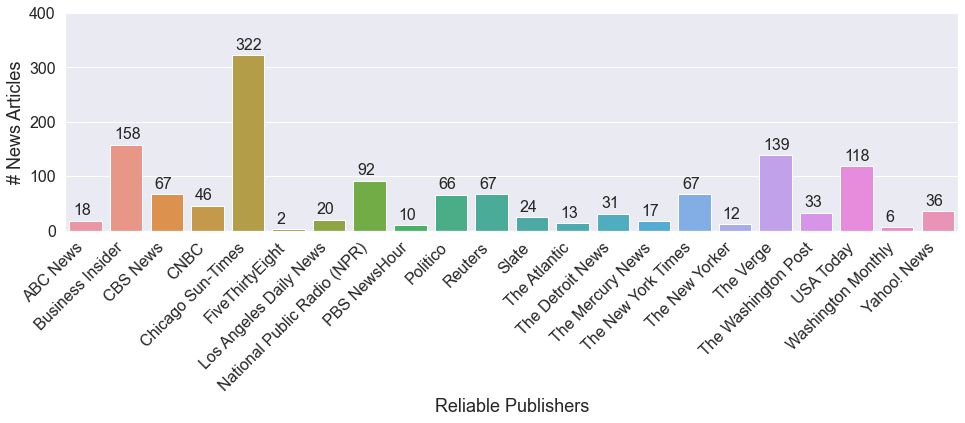

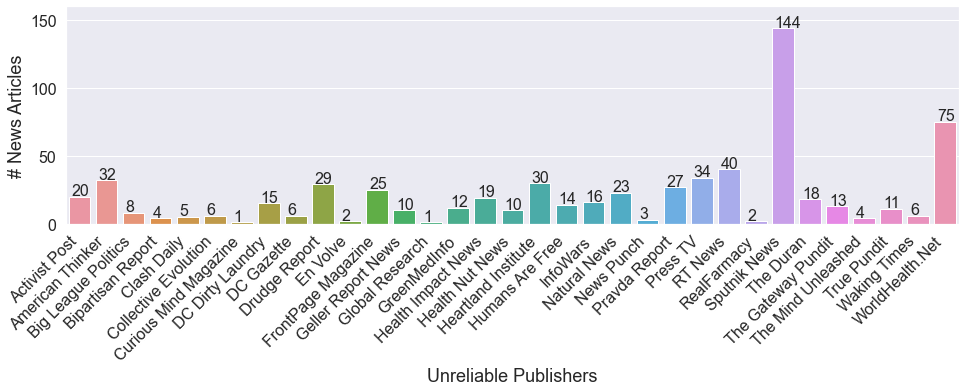

In [201]:
news_publishers0 = []
news_nums0 = []

print("===== Reliable =====")
total_news0 = 0
for CSV_FILE_NAME in CSV_FILE_NAMES0:
    if CSV_FILE_NAME[:12]=="news-dataset":
        df = pd.read_csv(CSV_FILE_DIR0 + '/' + CSV_FILE_NAME) 
        df = df[ ~df['publish_date'].isin(remove_dates) ]
        print(df['publisher'][0], "\t # News: ", df.shape[0])
        
        news_publishers0.append(df['publisher'][0])
        news_nums0.append(df.shape[0])
        
        total_news0 += df.shape[0]
print("Total # News: ", total_news0)

tem = list(zip(news_publishers0, news_nums0))
tem = sorted(tem, key=lambda x: x[0], reverse=False)
news_publishers0, news_nums0 = zip(*tem)

plt.figure(figsize=(16,4))
ax = sns.barplot(x=list(news_publishers0),y=list(news_nums0))
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Reliable Publishers')
plt.ylabel('# News Articles')
plt.ylim([0,400])
plt.savefig(CSV_FILE_DIR_HEAD+'figure/publisher_newsNum__reliable.eps', bbox_inches='tight')
plt.show()


news_publishers1 = []
news_nums1 = []

print("")
print("===== Unreliable =====")
total_news1 = 0
for CSV_FILE_NAME in CSV_FILE_NAMES1:
    if CSV_FILE_NAME[:12]=="news-dataset":
        df = pd.read_csv(CSV_FILE_DIR1 + '/' + CSV_FILE_NAME) 
        df = df[ ~df['publish_date'].isin(remove_dates) ]
        print(df['publisher'][0], "\t # News: ", df.shape[0])
        
        news_publishers1.append(df['publisher'][0])
        news_nums1.append(df.shape[0])
        
        total_news1 += df.shape[0]
print("Total # News: ", total_news1)

tem = list(zip(news_publishers1, news_nums1))
tem = sorted(tem, key=lambda x: x[0], reverse=False)
news_publishers1, news_nums1 = zip(*tem)

plt.figure(figsize=(16,4))
ax = sns.barplot(x=list(news_publishers1),y=list(news_nums1))
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Unreliable Publishers')
plt.ylabel('# News Articles')
plt.ylim([0,160])
plt.savefig(CSV_FILE_DIR_HEAD+'figure/publisher_newsNum__unreliable.eps', bbox_inches='tight')
plt.show()

print("")
print("===== Overall =====")
news_publishers = news_publishers0 + news_publishers1
news_nums = news_nums0 + news_nums1
print("Total # News: ", total_news0 + total_news1)

# tem = list(zip(news_publishers, news_nums))
# tem = sorted(tem, key=lambda x: x[0], reverse=False)
# news_publishers, news_nums = zip(*tem)
# 
# plt.figure(figsize=(18,4))
# ax = sns.barplot(x=list(news_publishers),y=list(news_nums))
# for p in ax.patches:
#         ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+10))
# plt.xticks(rotation=45, horizontalalignment='right')
# plt.xlabel('Publishers')
# plt.ylabel('# News Articles')
# plt.ylim([0,400])
# plt.savefig(CSV_FILE_DIR_HEAD+'figure/publisher_newsNum.eps', bbox_inches='tight')
# plt.show()

publish_date distribution
    - x-axis: date
    - y-axis: # news 

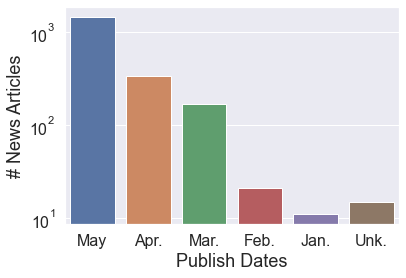

In [202]:
publish_dates = dfs['publish_date'].values
dates = np.array(publish_dates, dtype=str)
nums = np.zeros(publish_dates.shape, dtype=int)
for idx, date in enumerate(dates):
    if date == 'nan':
        nums[idx] = 0
    else:
        dates[idx] = date[:7]
        time_array = time.strptime(date, "%Y-%m-%d")
        nums[idx] = int(time.mktime(time_array))
tem = list(zip(nums, dates))
tem = sorted(tem, key=lambda x: x[0], reverse=True)
num, dates = zip(*tem)

num = np.array(num, dtype=int)
dates = np.array(dates, dtype=str)

dates[ dates=='2020-05' ] = 'May'
dates[ dates=='2020-04' ] = 'Apr.'
dates[ dates=='2020-03' ] = 'Mar.'
dates[ dates=='2020-02' ] = 'Feb.'
dates[ dates=='2020-01' ] = 'Jan.'
dates[ dates=='nan' ] = 'Unk.'

ax = sns.countplot(dates)
# plt.xticks(rotation=20, horizontalalignment='right')
plt.xlabel('Publish Dates')
plt.ylabel('# News Articles')
# plt.ylim([0,800])
ax.set_yscale('log')
plt.savefig(CSV_FILE_DIR_HEAD+'figure/publishDate_count.eps', bbox_inches='tight')
plt.show()

author distribution
    - x-axis: # authors
    - y-axis: # news 

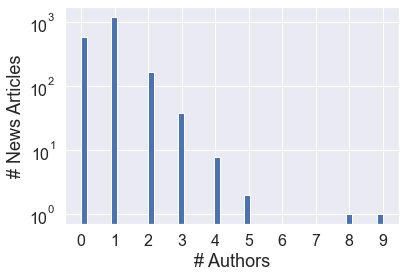

In [203]:
hist_kws = {'alpha': 1}

authors = dfs['author'].values
authors = np.array(authors, dtype=str)
nums = np.zeros(authors.shape, dtype=int)
for idx, author in enumerate(authors):
    if author == "[]":
        nums[idx] = 0
    else:
        author_names = author[1:-1].split(',')
        nums[idx] = len(author_names)

ax = sns.distplot(nums, hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Authors')
plt.ylabel('# News Articles')
plt.xlim([nums.min()-0.5,nums.max()+0.5])
plt.xticks(np.arange(nums.max()+1))
ax.set_yscale('log')
plt.savefig(CSV_FILE_DIR_HEAD+'figure/authorNum_count.eps', bbox_inches='tight')
plt.show()

# ax = sns.countplot(author_nums)
# plt.xlabel('# Authors')
# plt.ylabel('# News Articles')
# ax.set_yscale('log')
# plt.savefig(CSV_FILE_DIR_HEAD+'figure/authorNum_count.eps', bbox_inches='tight')
# plt.show()

author collaboration networks?

distribution of # words within a news article
    - x-axis: # words (title+bodytext)
    - y-axis: # news articles

Democrats Say The Worst Of The Coronavirus Is Yet To Come. Republicans Say The Worst Is Over.
[17 12 14 11  9]
[1489 1124  866  305  492]
[1506 1136  880 ... 1413 1601 1306]


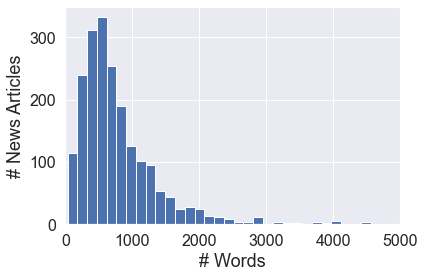

In [204]:
titles = dfs['title'].values
titles = np.array(titles, dtype=str)
title_word_nums = np.zeros(titles.shape, dtype=int)

bodies = dfs['body_text'].values
bodies = np.array(bodies, dtype=str)
body_word_nums = np.zeros(bodies.shape, dtype=int)

print(titles[0])
# print(bodies[0])
# print(titles[5].split(' '))

for idx, title in enumerate(titles):
    title_word_nums[idx] = len(title.split(' '))
print(title_word_nums[:5])

for idx, body in enumerate(bodies):
    body_word_nums[idx] = len(body.split(' '))
print(body_word_nums[:5])

nums = title_word_nums + body_word_nums
print(nums)
  
ax = sns.distplot(nums, bins=170, hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Words')
plt.ylabel('# News Articles')
plt.xlim([0, 5000])
# plt.xticks(np.arange(max(word_nums)))
# plt.ylim([0,850])
# ax.set_yscale('log')
plt.savefig(CSV_FILE_DIR_HEAD+'figure/wordNum_count.eps', bbox_inches='tight')
plt.show()    


image distribution
    - x-axis: have an image or have no image
    - y-axis: # news articles
    

In [205]:
images = dfs['image'].values
images = np.array(images, dtype=str)
nums = np.zeros(images.shape, dtype=int)
for idx, image in enumerate(images):
    if image == 'nan':
        nums[idx] = 0
    else:
        nums[idx] = 1

print("# News articles with images: ", nums.sum())
print("# News articles with NO images: ", nums.shape[0] - nums.sum())

# ax = sns.countplot(nums)
# for p in ax.patches:
#         ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
# plt.xlabel('# Images')
# plt.ylabel('# News Articles')
# # ax.set_yscale('log')
# plt.savefig(CSV_FILE_DIR_HEAD+'figure/imageNum_count.eps', bbox_inches='tight')
# plt.show()        

# News articles with images:  2017
# News articles with NO images:  12


political bias distribution
    - x-axis: political bias
    - y-axis: # publishers / # news articles

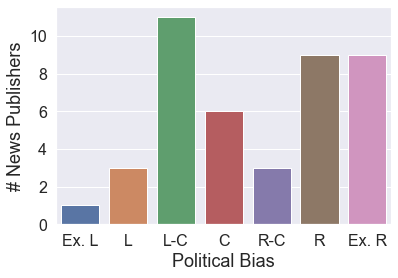

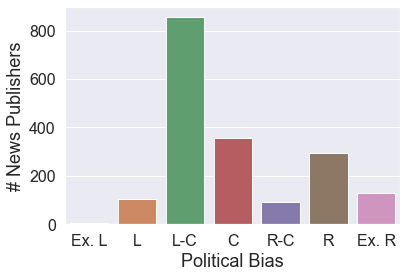

In [206]:
news_publishers = []
political_bias = []

for CSV_FILE_NAME in CSV_FILE_NAMES0:
    if CSV_FILE_NAME[:12]=="news-dataset":
        df = pd.read_csv(CSV_FILE_DIR0 + '/' + CSV_FILE_NAME)         
        df = df[ ~df['publish_date'].isin(remove_dates) ]
        news_publishers.append(df['publisher'][0])
        political_bias.append(df['political_bias'][0])

for CSV_FILE_NAME in CSV_FILE_NAMES1:
    if CSV_FILE_NAME[:12]=="news-dataset":
        df = pd.read_csv(CSV_FILE_DIR1 + '/' + CSV_FILE_NAME) 
        df = df[ ~df['publish_date'].isin(remove_dates) ]
        news_publishers.append(df['publisher'][0])
        political_bias.append(df['political_bias'][0])

political_bias = np.array(political_bias, dtype=str)
political_bias[ political_bias=='Extreme left' ] = 'Ex. L'
political_bias[ political_bias=='Extreme right' ] = 'Ex. R'
political_bias[ political_bias=='Left-center' ] = 'L-C'
political_bias[ political_bias=='Right-center' ] = 'R-C'
political_bias[ political_bias=='Left' ] = 'L'
political_bias[ political_bias=='Right' ] = 'R'
political_bias[ political_bias=='Center' ] = 'C'

ax = sns.countplot(political_bias, order = ['Ex. L', 'L', 'L-C', 'C', 'R-C', 'R', 'Ex. R'])
plt.xlabel('Political Bias')
plt.ylabel('# News Publishers')
plt.savefig(CSV_FILE_DIR_HEAD+'figure/politicalBias_publihserCount.eps', bbox_inches='tight')
plt.show()

##########################
political_bias = dfs['political_bias']
political_bias = np.array(political_bias, dtype=str)
political_bias[ political_bias=='Extreme left' ] = 'Ex. L'
political_bias[ political_bias=='Extreme right' ] = 'Ex. R'
political_bias[ political_bias=='Left-center' ] = 'L-C'
political_bias[ political_bias=='Right-center' ] = 'R-C'
political_bias[ political_bias=='Left' ] = 'L'
political_bias[ political_bias=='Right' ] = 'R'
political_bias[ political_bias=='Center' ] = 'C'

ax = sns.countplot(political_bias, order = ['Ex. L', 'L', 'L-C', 'C', 'R-C', 'R', 'Ex. R'])
plt.xlabel('Political Bias')
plt.ylabel('# News Publishers')
plt.savefig(CSV_FILE_DIR_HEAD+'figure/politicalBias_newsCount.eps', bbox_inches='tight')
plt.show()




NewsGuard distribution
    - x-axis: NewsGuard score
    - y-axis: # news publishers

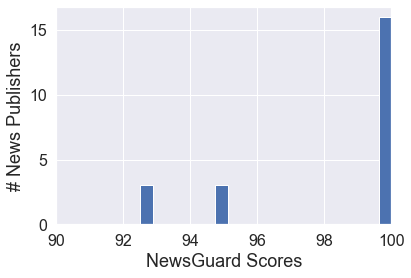

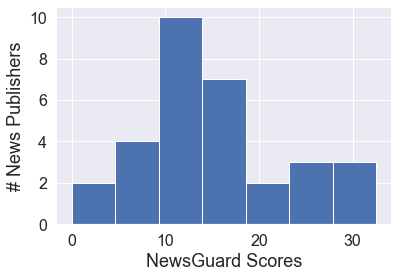

In [207]:
news_publishers = []
newsguard_scores = []

for CSV_FILE_NAME in CSV_FILE_NAMES0:
    if CSV_FILE_NAME[:12]=="news-dataset":
        df = pd.read_csv(CSV_FILE_DIR0 + '/' + CSV_FILE_NAME)         
        df = df[ ~df['publish_date'].isin(remove_dates) ]
        news_publishers.append(df['publisher'][0])
        newsguard_scores.append(df['news_guard_score'][0])

# ax = sns.countplot(newsguard_scores)
ax = sns.distplot(newsguard_scores, bins=20, hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('NewsGuard Scores')
plt.ylabel('# News Publishers')
plt.xlim([90, 100])
plt.savefig(CSV_FILE_DIR_HEAD+'figure/newsGuardScore0_count.eps', bbox_inches='tight')
plt.show()    


news_publishers = []
newsguard_scores = []

for CSV_FILE_NAME in CSV_FILE_NAMES1:
    if CSV_FILE_NAME[:12]=="news-dataset":
        df = pd.read_csv(CSV_FILE_DIR1 + '/' + CSV_FILE_NAME) 
        df = df[ ~df['publish_date'].isin(remove_dates) ]
        news_publishers.append(df['publisher'][0])
        newsguard_scores.append(df['news_guard_score'][0])

# ax = sns.countplot(newsguard_scores)
ax = sns.distplot(newsguard_scores, bins=7, hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('NewsGuard Scores')
plt.ylabel('# News Publishers')
# plt.xlim([90, 100])
plt.savefig(CSV_FILE_DIR_HEAD+'figure/newsGuardScore1_count.eps', bbox_inches='tight')
plt.show()    

MBFC distribution
    - x-axis: MBFC level
    - y-axis: # news publishers

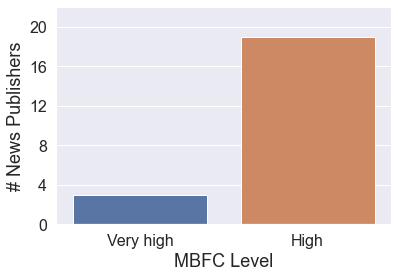

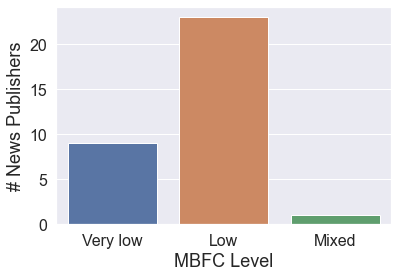

In [208]:
news_publishers = []
mbfc_level = []

for CSV_FILE_NAME in CSV_FILE_NAMES0:
    if CSV_FILE_NAME[:12]=="news-dataset":
        df = pd.read_csv(CSV_FILE_DIR0 + '/' + CSV_FILE_NAME)         
        df = df[ ~df['publish_date'].isin(remove_dates) ]
        news_publishers.append(df['publisher'][0])
        mbfc_level.append(df['mbfc_level'][0])

ax = sns.countplot(mbfc_level, order=['Very high', 'High'])
plt.xlabel('MBFC Level')
plt.ylabel('# News Publishers')
plt.ylim([0,22])
plt.yticks(np.arange(0,22,4))
plt.savefig(CSV_FILE_DIR_HEAD+'figure/mbfcLevel0_count.eps', bbox_inches='tight')
plt.show()


news_publishers = []
mbfc_level = []

for CSV_FILE_NAME in CSV_FILE_NAMES1:
    if CSV_FILE_NAME[:12]=="news-dataset":
        df = pd.read_csv(CSV_FILE_DIR1 + '/' + CSV_FILE_NAME) 
        df = df[ ~df['publish_date'].isin(remove_dates) ]
        news_publishers.append(df['publisher'][0])
        mbfc_level.append(df['mbfc_level'][0])

ax = sns.countplot(mbfc_level)
plt.xlabel('MBFC Level')
plt.ylabel('# News Publishers')
# plt.ylim([0,22])
# plt.yticks(np.arange(0,22,4))
plt.savefig(CSV_FILE_DIR_HEAD+'figure/mbfcLevel1_count.eps', bbox_inches='tight')
plt.show()


country distribution
    - x-axis: country
    - y-axis: # news publishers
    

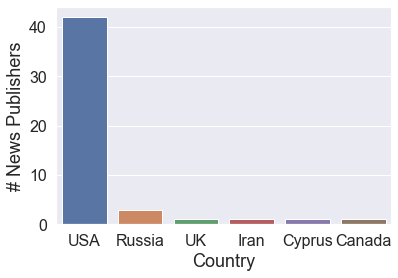

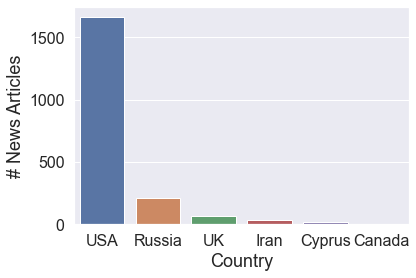

In [210]:
news_publishers = []
countries = []

for CSV_FILE_NAME in CSV_FILE_NAMES0:
    if CSV_FILE_NAME[:12]=="news-dataset":
        df = pd.read_csv(CSV_FILE_DIR0 + '/' + CSV_FILE_NAME)         
        df = df[ ~df['publish_date'].isin(remove_dates) ]
        news_publishers.append(df['publisher'][0])
        countries.append(df['country'][0])

for CSV_FILE_NAME in CSV_FILE_NAMES1:
    if CSV_FILE_NAME[:12]=="news-dataset":
        df = pd.read_csv(CSV_FILE_DIR1 + '/' + CSV_FILE_NAME) 
        df = df[ ~df['publish_date'].isin(remove_dates) ]
        news_publishers.append(df['publisher'][0])
        countries.append(df['country'][0])

ax = sns.countplot(countries, order = ['USA', 'Russia', 'UK', 'Iran', 'Cyprus', 'Canada'])
plt.xlabel('Country')
plt.ylabel('# News Publishers')
plt.savefig(CSV_FILE_DIR_HEAD+'figure/country_publihserCount.eps', bbox_inches='tight')
plt.show()

##########################
countries = dfs['country']
ax = sns.countplot(countries, order = ['USA', 'Russia', 'UK', 'Iran', 'Cyprus', 'Canada'])
plt.xlabel('Country')
plt.ylabel('# News Articles')
plt.savefig(CSV_FILE_DIR_HEAD+'figure/country_newsCount.eps', bbox_inches='tight')
plt.show()